<a href="https://colab.research.google.com/github/hyndhavamahesh345/Task-8-Clustering-with-K-Means/blob/main/task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
# Load Dataset
df = pd.read_csv("Mall_Customers.csv")

In [4]:
# Data Preprocessing
# We'll only use 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Optionally scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

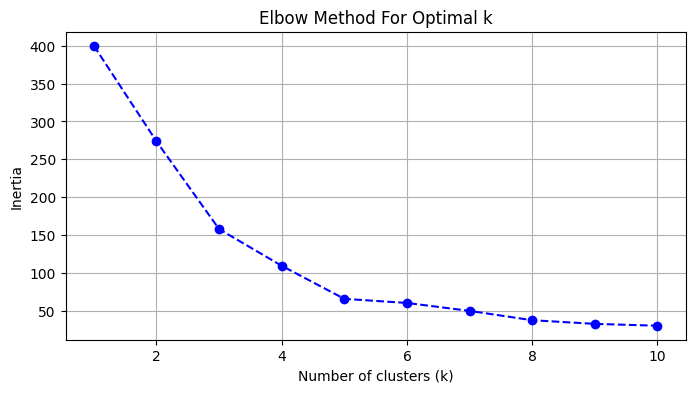

In [5]:
# Elbow Method to Determine Optimal Clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [6]:
# Apply KMeans with Chosen k (Let's choose k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster info to original data
df['Cluster'] = cluster_labels

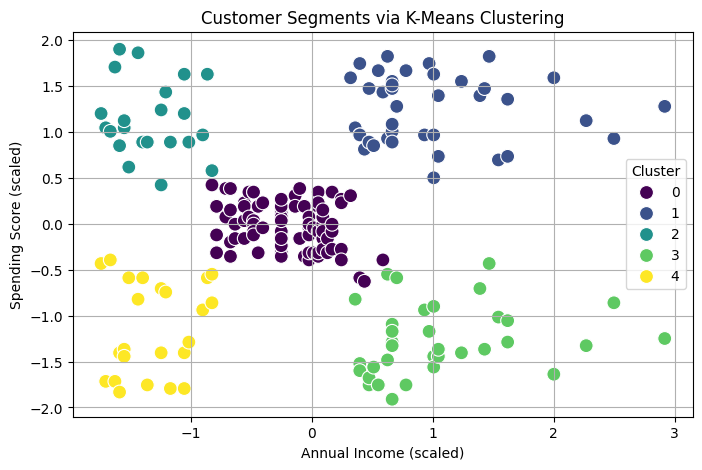

In [7]:
# Visualize Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 1],
    hue=cluster_labels, palette='viridis', s=100
)
plt.title('Customer Segments via K-Means Clustering')
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [8]:
# Evaluate Clustering
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for k=5: {silhouette_avg:.4f}")

Silhouette Score for k=5: 0.5547


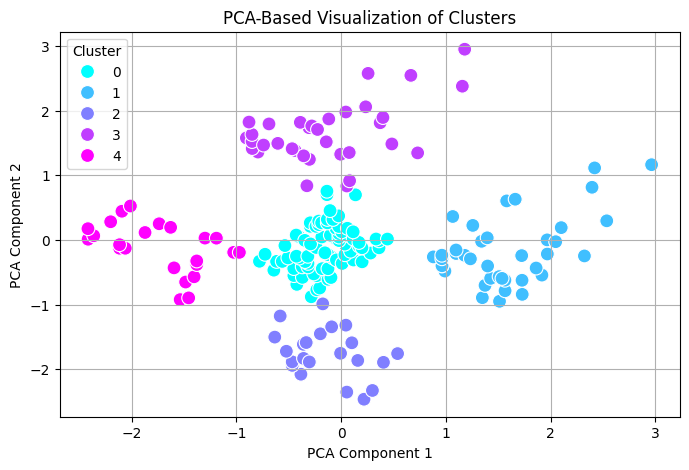

In [9]:

# PCA for 2D Visual Clustering (if using more features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=cluster_labels, palette='cool', s=100
)
plt.title('PCA-Based Visualization of Clusters')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
